# Homework 3: Linear Equations

## Objectives

In this homework we will focus on
- Avoiding writing loops! Become more familiar with using arrays and the functions that act on them.
- Become familiar with array slicing.  This is a very powerful was of easily manipulating data, but does require some practice for it to become natural.
- Extend array slicing by slicing based on conditions.
- Learn to solve systems of linear equations.


## Initialization

As always you should add initialization to the top of your notebook. Though not strictly necessary, it is a good habit to include all initialization here.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Avoiding Loops

Loops in `python`, unfortunately, can be slow and prone to coding errors.  We have already been using a few features of `NumPy` that allow us to avoid writing loops: functions work on arrays of values and array slicing allows us to view an array in many ways without having to create a new array.  We will continue to learn about these features along with a few other ones.  Often we  write loops to perform mathematical operations.  In languages that include vector processing capabilities, provided in `python` through the `NumPy` module, there is almost always a function that can be used to perform the calculation without the need to write such a loop.  The price we pay for this is that we must be able to store all of the information needed for the calculation in arrays.  In other words, the tradeoff is between memory usage and computation speed:  with little memory usage we can write a loop which will be slow, with a lot of memory usage we can perform the calculation "all at once" using a built-in function which is often significantly faster than the loop.

### Sums

As a simple example of this consider a sum of integers, this has a known analytic result:

$$ \sum_{j=1}^N j = \frac{N(N+1)}{2}. $$

We can easily evaluate this sum by constructing an array holding all the integers from $1$ to $N$ (including $N$) and using the `sum` function from NumPy. Show the use of the `sum` function by evaluating this sum for various values of $N$ and verifying it agrees with the analytic result.  Show the result for one case (for example $N=12$).  

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Accessing Data in Arrays

In our quest to avoid writing loops we need ways of accessing and changing data in arrays without needing to individually step through each element.  We have seen that many numpy operations and functions act on arrays exactly as we would expect (or hope) they would.  We have also seen that array slicing provides a convenient way of accessing parts of an array.  We will now study this more carefully.

### Indexing

We have already seen how to index elements in an array.  Array indices in python start at zero, whether this seems strange or the obvious choice depends on how you think about arrays and the programming languages you have used.  If you are familiar with pointers or references, then this is the obvious choice.  Consider the array `a = [0, 0.25, 0.5, 0.75, 1]`.  In Python (and C and related languages) if we construct such an array, for example as `a = np.linspace(0, 1, 5)`, then we can think of `a` as pointing to the beginning of the array.  Thus `a[0]` represents moving the pointer zero elements along the array, `a[1]` as moving the pointer one element along the array, and in general `a[j]` as moving `j` elements along the array.  This is represented in the figure below, where we see that `a[2]` is two steps along the array so it contains the value `0.5`.  This choice is confusing in the sense that `a[2]` is the *third element* in the array, not the second.

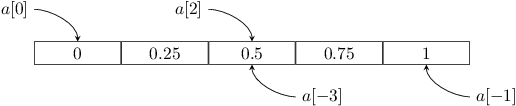

Similarly, this choice makes it easy to understand what it means to step backwards in an array.  In particular `a[-1]` represents stepping one element backwards from the beginning of the array with the extra fact that we *wrap around* the array, so that we end up at the last element in it.  We can then understand what any backwards step, `a[-j]`, means.  For the example above this means that `a[-3]` is the same as `a[2]`.

Note that while this way of picturing negative indexing is nice, we should be careful not to push it to far.  An array is not cyclic (it is not periodic).  We *can* walk off the end or beginning of the array.  Thus in the example above, `a[j]` is **not defined** for $j\ge 5$ or $j<-5$.

These ideas extend to two dimensional arrays.  For a two dimensional array, `M`, then `M[i,j]` is the element from *row* `i` and column `j`.  Again, both of these index values start from zero.

It is expected that you are comfortable accessing elements of an array.  Feel free to generate arrays and play with pulling out specific elements of them.

###     Array Slicing

Array slicing is discussed in detail in Sections 2.2 and 3.4 of the *Guide to Numpy* (see the course syllabus for a link).  We will only need basic slicing and will study some simple cases here.

#### One Dimension

The index we use to access elements of an array need not just be a single number.  The generic structure is `[start:end:step]`.  This will give a view of the array starting at index `start` and proceeding up to, *but not including*, index `end` in steps of `step`.  We can leave out any of the values and use the defaults instead.  The default for `start` is the first index (zero), the default for `end` is the length of the array, and the default for `step` is one.  This means there are many ways to reference the whole array.  Let `a` be a one dimensional array, then all the following are equivalent: `a`, `a[:]`, `a[::]`, `a[0:len(a)]`, `a[0:len(a):]`, `a[0::1]`, and `a[0:len(a):1]`. 

Array slicing is more than just a convenient way of viewing the data, it also allows us to *change* parts of the array.  Technically, array slicing gives a *view* of the array.  It **does not make a copy**, it really produces a "smart pointer" that allows us to examine and modify parts of an array.  This is a very important and powerful feature.  For the small arrays we will work with here it would not matter if we made copies, but if we were working with very large arrays this would be very important.

Let `a=np.arange(20)`.  Use array slicing to print every third value of the array, that is, to print `a[0]`, `a[3]`, ....

In [ ]:
a=np.arange(20)
# YOUR CODE HERE
raise NotImplementedError()

For the array of **integers** `a` from the previous part, modify the array so that all the even elements are multiplied by 2, that is, replace all the even values by their values multiplied by 2.  Print the modified array. (*Note:* Python supports in-place operators such as `+=`, `-=`, `*=`, `/=`, `//=`, and a few others that you may be familiar with from other languages.  It does not, however, support `++` nor `--`.)

In [ ]:
# Note: a is an integer array so we need to store an integer in it.
# Thus we need to use integer division, which // does for us.
# YOUR CODE HERE
raise NotImplementedError()

#### Higher Dimensions

Array slicing works for higher dimensional arrays also.  Let `M` be a two dimensional array with 6 rows and 4 columns.  Since NumPy arrays are accessed in row major order, the fourth row of the array can be accessed as `M[3,:]` or in shorthand as `M[3]`.  The third column can be accessed as `M[:,2]`.  Notice that to access a row we can use a shortcut but to access a column we must specify something about the rows.  In the example of accessing the third column we are asking for all the rows (represented by the `:`).

For `M` a 6 by 4 array as discussed above state the size and the specific elements that will be accessed by `M[::2,::3]`.  For example, this will access `M[0,0]`, what other elements will this access?  How many rows and columns will be accessed? (*Note:* You should think about this first, then feel free to construct an example array and test your ideas.)

The resulting array will be 3 by 2 and contain the elements from the original array:
- `M[0,0]`, `M[0,3]`,
- `M[2,0]`, `M[2,3]`,
- `M[4,0]`, `M[4,3]`

### Conditional Slicing

The simple slicing discussed above is great if we have regularly spaced indices we wish to access.  There are also techniques for selecting elements of an array based on other conditions.  One way of doing this is through the `where` command provided by NumPy (you should look through its documentation).  To become familiar with using it we will consider a simple example.

In [ ]:
a = np.linspace(0, 1, 20)
np.where(a>=0.5)

By default the `where` function returns an array of index values for which the condition specified is true.  Actually, if we look more closely at what is printed we see it really is returning a `tuple` of arrays.  This is done because the `where` function also works for multidimensional arrays and it is returning the index values in a more general format.  (This is discussed in the sections of the *Guide to Numpy* noted above.)  This is "annoying" when working with 1 dimensional arrays when we are interested in the index values themselves (as opposed to the values in array `a`).  A couple of common idioms for obtaining the array of index values in the one dimensional case are
```
ind = np.where(a>=0.5)[0]
ind, = np.where(a>=0.5)
```
Notice the comma in the second expression.

Construct an array of 20 random values between 0 and 1 using `np.random.rand`.  Use the `where` command to find all values in this array larger than 0.5.  Replace those values with one minus their value, that is "fold" them back to be in the interval $[0,0.5]$.  Print the updated array.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

The previous question can also be solved without using the `where` command.  We can instead construct a boolean array showing where the condition is satisfied as seen below. This boolean array can also be used as an index.

(*Think about the following cell before you run it.  What do you expect to happen and why? Then run them and make sense of the results for yourself!*)

In [ ]:
b = np.random.rand(20)
boolind = b>0.5
print(b)
print(boolind)

# Only print the values satisfying our condition: b>0.5
print(b[boolind])

Finally, multiple conditions can be specified using the logical operator `|` for *or* and `&` for *and*.  In doing so we must be careful about *order of operations*.  It is best to enclose conditions in parentheses.  The conditions can be specified in the same way in the `where` command and they create a boolean array.  Again, it is best to look at some examples.

In [ ]:
a = np.linspace(0,1,20)
# Print all values smaller than 0.25 or larger than 0.75.
# We could do this with the where command or a boolean array,
# here I show the use of the where command.
ind = np.where((a<0.25)|(a>0.75))
print(a[ind])
# Print all the values between 0.25 and 0.75, inclusive.
# Here I show the use of a boolean array.
print(a[(a>=0.25)&(a<=0.75)])

Construct a 6 by 4 array of random values using `np.random.rand`.  Print all values in the array less than 0.3 or between 0.5 and 0.8, inclusive.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### View Versus Copy

NumPy always tries to return a view of an array when it can, only making a copy when it needs to.  The exact rules for this depend on many details we have not discussed.  For us this means that we must always be careful when assigning arrays, or slices of arrays, to variables; particularly if we then change some elements of the arrays or their slices.  Things may not behave as we expect.  This can lead to many hard to discover bugs, particularly when arrays are passed to functions and those functions change elements in the array they receive.  We expect these changes to be localized to the function, but they are not!

If we are going to change elements of an array and we are uncertain if it is also stored and used under another name, it is best to make a copy of the array.  For example
```
b = a.copy()
```
will ensure that `b` starts with the same elements as `a`, but is a copy, so changing `b` will not affect `a`.

To make this more clear consider the following cell.  Think about what you expect `a`, `b`, `c`, and `d` to contain after this is run.

In [ ]:
a = np.arange(10)
b = a[::2]
b += 1
c = np.arange(10)
d = c[::2].copy()
d += 1

print("a =", a)
print("b =", b)
print("c =", c)
print("d =", d)

Both `a` and `c` start with integer values from 0 to 9.  Array `b` starts as a **view** of the even indexed values of `a`, so index values 0, 2, ..., 8.  We then add 1 to `b` which changes all of its values to the odd values 1, 3, ..., 9.  Since `b` is a view of `a`, we **also change `a`**!  This is a side effect we may not have expected.  It is powerful and very useful, but can be surprising if we are not aware of it.

For `c` and `d` we perform the same operations except that `d` is a **copy** of the 0, 2, ..., 8 index values of `c`, so `d` is a new array.  Thus when we change `d` we only change it, `c` is unaffected.  Thus `d` has the same values as `b` did (for the same reason as above) but `c` remains unchanged.

## Tridiagonal systems

For matrices with certain structures, especially matrices with many zero elements, specialized routines often exist. So while we can solve many systems using `scipy.linalg.solve`, that is not always the most efficient choice.  Here we will consider a matrix $\mathsf{A}$ which is tridiagonal, a form we can use that to both speed up the solution and to simplify the code.  To begin, we can actually avoid the need to compute and store the entire matrix by storing the information in a much simpler, more efficient manner. To exploit the structure, we will instead use `scipy.linalg.solve_banded`.  Look up its documentation!  We need to understand how to use it - we will be working with a similar matrix in this weeks Lab.

The documentation fully describes how to store a trigiaconal matrix in a form that exploits its banded nature.  The function works for an arbitrary banded matrix.  Although the documentation is good, to further help let us write out the example they discuss in a bit more detail.  The example in the documentation is a $6\times6$ banded matrix that we can write out in its entirety as

$$\mathsf{a} = \left( \begin{array}{cccccc}
a_{00} & a_{01} & 0 & 0 & 0 & 0 \\
a_{10} & a_{11} & a_{12} & 0 & 0 & 0 \\
a_{20} & a_{21} & a_{22} & a_{23} & 0 & 0 \\
0 & a_{31} & a_{32} & a_{33} & a_{34} & 0 \\
0 & 0 & a_{42} & a_{43} & a_{44} & a_{45} \\
0 & 0 & 0 & a_{53} & a_{54} & a_{55}
\end{array} \right).$$

This is converted to the banded version, `ab`, as shown in the documentation.  In `ab` the elements marked by an asterisk (`*`) are not used by the algorithm so may be set to any value.  Finally, the algorithm needs to know the number of "bands" below and above the main diagonal.  These are specified by the `tuple` `(l,u)`.  Study the documentation to make sure you understand how this matrix, $\mathrm{a}$, gets converted to the banded version `ab` and what the values `l` and `u` represent.

Below, we will consider a tridiagonal matrix with the following elements,

$$ \mathsf{A} = \left( \begin{array}{ccccc}
-2r & r & 0 & 0 & 0 \\
r & -2r & r & 0 & 0 \\
0 & r & -2r & r & 0 \\
0 & 0 & r & -2r & r \\
0 & 0 & 0 & r & -2r 
\end{array} \right)$$

This matrix, and matrices with similar forms, often appear when we use finite difference methods to solve differential equations. This matrix is in fact a representation of a discrete Laplacian operator! We will return to this idea in the Lab, where we will solve the Schrodinger equation.
For now, construct the banded version of this matrix, `ab` as used by `scipy.linalg.sovle_banded`. Also print the matrix for the case when `r=0.25`.

This should be possible using array manipulations as discussed above.  If you find yourself writing a lot of code or using a loop, consider how you might use the array slicing.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Next, suppose we wish to solve the system $\mathsf{A} \vec{x} = \vec{b}$. Given the vector

$$\vec{b} = (0,0,0,0,-1.5)$$

(also below), determine $\vec{x}$ using  `scipy.linalg.sovle_banded`. Again assume $r=0.25$.
As a check, your solution should be $\vec{x} = (1, 2, 3, 4, 5)$.

In [ ]:
b = np.array([0.,0.,0.,0.,-1.5])

# YOUR CODE HERE
raise NotImplementedError()

Note that our matrix $\mathsf{A}$ is actually a symmetric tridiagonal matrix.  Exploiting this extra symmetry could be even more efficient in terms of memory use and computational time.  This could be done using the even more specialized function `scipy.linalg.solveh_banded`.  Feel free to look up this function and how to use it, though this will not be required for the problems in the lab, you can use it if you desire.

## The Schrödinger Equation

**In the lab this week we will solve the Schrödinger equation in one dimension for two different potentials. You should make sure to read through and complete this part of the homework before class on Friday.**

Mathematically, much of quantum mechanics reduces to solving eigenvalue problems.  You may have encountered the time independent Schrödinger equation in a quantum course.  In its shortest form it may be written as $\hat H \psi(x)=E\psi(x)$.  Here $\hat H$ is the Hamiltonian operator which we will have more to say about, $E$ is the energy of the system, and $\psi(x)$ is the wave function which encodes the information about the state of the system.  The Hamiltonian is determined from the physics, so given a Hamiltonian, our goal is to solve for the energy and the wave function.

When we first study quantum mechanics we typically write the Hamiltonian as a differential operator.  For a single particle in one dimension the nonrelativistic Hamiltonian may be written as

$$\hat H = -\frac{\hbar^2}{2m} \frac{\mathrm{d}^2}{\mathrm{d}x^2}+V(x).$$

Here $\hbar=h/2\pi$ is the reduced Planck constant and $V(x)$ is the potential energy (though we will just refer to it as a potential).  It is convenient to work in units of $\hbar$ and $m$ meaning that they get absorbed into the energies.  In this case the Schrödinger equation becomes

$$ -\frac12 \frac{\mathrm{d}^2 \psi(x)}{\mathrm{d}x^2}+V(x)\psi(x)=E\psi(x).$$

In a quantum mechanics course we solve this equation for various choices of the potential energy.  To solve it numerically we can proceed in a number of ways.  One is to use a differential equation integrator, such as `scipy.integrate.odeint`, to do the work for us.  [Since this is such an important equation, specialized integrators have been developed which would be even better to use.]  *An alternative approach* is to instead we will turn it into a matrix equation and solve it as an eigenvalue problem.

We can discretize the second derivative using

$$ \frac{\mathrm{d}^2 \psi(x)}{\mathrm{d}x^2} = \frac{\psi(x-h) - 2 \psi(x) + \psi(x+h)}{h^2} + \mathcal{O}(h^2).$$

Note that here $h$ is a step size, and is unrelated to Planck's constant.  Despite the fact that this algorithm is only accurate to order $h^2$ it will be sufficient for our purposes.  With this we can rewrite the Schrödinger equation in matrix form

$$ \mathsf{H}\vec\psi = E\vec\psi, $$

where $\mathsf{H}$ is now *a matrix representing our Hamiltonian* and $\vec\psi$ is now *a vector representing our wave function*.

### Understanding the Linear System

We need to understand the linear system we just wrote down. The approach we will use and the structure we will find is very similar to that above.  To this end it is best to again grab some paper in order to work out some of the details.  We are again solving a one dimensional system in a region of length $L$ along the $x$-axis.  To do so we discretize the wave function by evaluating it at $N+1$ points. Further we will take these points to be equally spaced with step size $h$ along the $x$-axis so that $\psi_j \equiv \psi(x_j)$ with $x_j = x_0 + j h$.  With this and the discretized form of the second derivative we can rewrite $\hat H \psi(x)$ in the discrete (matrix) form $\mathsf{H}\vec \psi$.  Use this to find the form of $\mathsf{H}$.  You should find it is a symmetric tridiagonal matrix.

As above, it is best to begin with a small system.  Again let $N=4$ (so that we have 5 points).  Write out the 5 equations, one for each of the components $\psi_j$, and use this to construct the matrix $\mathsf{H}$. For the boundary conditions let $\psi_{-1} = \psi_{N+1} = 0$.  Notationally it is also convenient to write $V_j\equiv V(x_j)$. You should arrive at a matrix with the following form

$$ \mathsf{H} = \left( \begin{array}{ccccc}
\frac1{h^2}+V_0 & -\frac1{2h^2} & 0 & 0 & 0 \\
-\frac1{2h^2} & \frac1{h^2}+V_1 & -\frac1{2h^2} & 0 & 0 \\
0 & -\frac1{2h^2} & \frac1{h^2}+V_2 & -\frac1{2h^2} & 0 \\
0 & 0 & -\frac1{2h^2} & \frac1{h^2}+V_3 & -\frac1{2h^2} \\
0 & 0 & 0 & -\frac1{2h^2} & \frac1{h^2}+V_4 
\end{array} \right)\,.$$

### Eigenvalue Problem

Now that we know $\mathsf{H}$ we can solve the eigenvalue problem $\mathsf{H}\vec\psi = E\vec\psi$ for $E$ and $\psi$.  Since $\mathsf{H}$ is a tridiagonal matrix it is again best to use a specialized function for this case.  Thus instead of using `scipy.linalg.eig` or `scipy.linalg.eigh` we will use `scipy.linalg.eig_banded`.  Look up its documentation.  You should see it is similar to what we encountered above, except that it requires a symmetric banded matrix.  Fortunately that is exactly what we have.  In fact, this function is more similar to `scipy.linalg.solveh_banded`. 

It is easiest to use the function in its default configuration.  This means it will return both the eigenvalues and eigenvectors for $\mathsf{H}$ given the upper part of the matrix.  Once again study the documentation and pay particular attention to the *upper form* in the example.  There they show an example of a $6\times6$ matrix with 5 "diagonals" (2 upper and 2 lower bands along with the main diagonal.)

Provide code for constructing the matrix $\mathsf{H}$ in banded form as used by `scipy.linalg.eig_banded`.  Your code should work for arbitrary $N$, $h$, and potential $V(x)$.  To test your code apply it to the case where $N=4$, use points equally spaced on the interval $[0,1]$, and choose $V(x)=x^2$.  Print the banded matrix you construct.  (Its structure should make sense!)

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### Normalization

Unfortunately we are not quite done.  By convention when we solve an eigenvalue problem the eigenvectors are returned as unit vectors.  This means that when we solve the Schrödinger equation as an eigenvalue problem the eigenvectors will satisfy $|\vec\psi|^2 = 1$.  However, in quantum mechanics to allow a probabilistic interpretation of the wave function we instead require the integral condition

$$ \int |\psi(x)|^2 \mathrm{d}x = 1.  $$

(Here the integral is over the entire region where $\psi(x)\ne 0$.)  **These are not the same conditions.**  This means we need to renormalize the eigenvector to be consistent with the requirement from quantum mechanics.

Given an eigenvector, $\vec\psi$, how must we modify it to be consistent with the normalization condition from quantum mechanics?  To determine this it is simplest to discretize the integral condition from quantum mechanics.  Here it is sufficient to use the Riemann sum form of the integral from calculus, with equally spaced points, and see what rescaling is required in order that the integral condition is satisfied.  In other word, solving the eigenvalue problem gives us a vector, let us call it $\vec\psi^{(\mathrm{ev})}$, that satisfies $|\vec\psi^{(\mathrm{ev})}|^2=1$.  The state relevant for quantum mechanics is proportional to this, $\vec\psi = \alpha \vec\psi^{(\mathrm{ev})}$.  Our objective is to find $\alpha$. 

Using the Riemann sum (as the simplest example of a numerical integral, other methods will behave the same way) with spacing $h$ between points we have

$$ 1 = \int |\psi(x)|^2 \mathrm{d}x \approx \sum_j |\psi(x_j)|^2 h = h \sum_j |\alpha\psi_j^{(\mathrm{ev})}|^2 = h \alpha^2 |\vec \psi^{(\mathrm{ev})}|^2 = h \alpha^2. $$

Thus we require
$$ \alpha = \frac1{\sqrt h} $$
so that
$$ \vec\psi = \frac{\vec\psi^{(\mathrm{ev})}}{\sqrt h}. $$